In [1]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"訓練データの数: {len(train)} 件 (過去の教訓)")
print(f"テストデータの数: {len(test)} 件 (未知の未来)")
print("\n--- 両データにおける『住宅の質』の分布 ---")
print(test['OverallQual'].value_counts().sort_index())

訓練データの数: 1460 件 (過去の教訓)
テストデータの数: 1459 件 (未知の未来)

--- 両データにおける『住宅の質』の分布 ---
OverallQual
1       2
2      10
3      20
4     110
5     428
6     357
7     281
8     174
9      64
10     13
Name: count, dtype: int64


**第2章の現場検証：**

1459件の「容疑者」たち
エリートの予備軍（Quality 10）: テストデータにも 13件 の「最高級物件」が紛れ込んでいます。これらは第1章で見つけた「1182番の怪物」に匹敵する、2025年でも価値を落とさない勝者たちです。

**消えゆく運命の家**（Quality 1・2）: 一方で、最低ランクの家も合計 12件 存在します。これらは、データが収集された後、再開発や老朽化で物理的に消滅している可能性が高い「悲劇の物件」です。

/tmp/ipython-input-2585182156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OverallQual', data=test, palette='viridis')


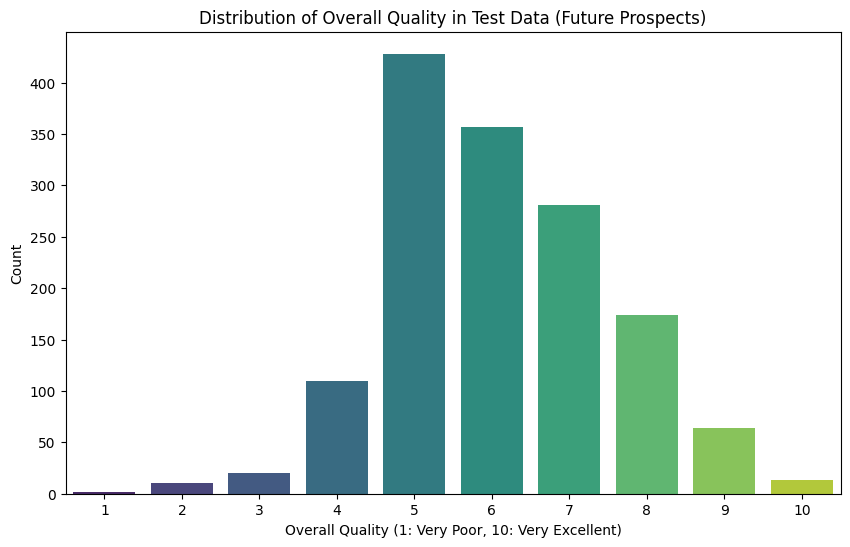

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='OverallQual', data=test, palette='viridis')
plt.title('Distribution of Overall Quality in Test Data (Future Prospects)')
plt.xlabel('Overall Quality (1: Very Poor, 10: Very Excellent)')
plt.ylabel('Count')
plt.show()

In [5]:
missing_test = test.isnull().sum()
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)
print("--- [緊急報告]　テストデータに潜む情報の『空白』 ---")
print(missing_test.head(15))

--- [緊急報告]　テストデータに潜む情報の『空白』 ---
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
dtype: int64


**欠損値リストから読み取る「アメリカの影」**

PoolQC（プール品質）: 1456件の空白

テストデータ 1459件中、なんと1456件にプールの記録がありません。

つまり、プールを持つ「超エリート」は、わずか 3件。訓練データ（train.csv）に比べて、エリートの割合がさらに絞り込まれています。2025年の今、この3件の価値は想像を絶するものになっているはずです。

Garage系（車庫）: 78件の空白

注目すべきは、GarageQual（品質）やGarageCond（状態）が「78件」欠落している点です。

アメリカの車社会において、車庫がない、あるいは記録すらできないほどボロボロな状態というのは、その家が「消えゆく家（Vanishing）」の筆頭候補であることを示唆しています。

MasVnrType（外壁の装飾）: 894件の空白

外壁に石や煉瓦の装飾がない家が半数以上。アメリカの住宅において、外装の豊かさは「階級」に直結します。ここからも、中間層以下の家がデータの大半を占めていることがわかります。